<a href="https://colab.research.google.com/github/Rachita1851/Black-Friday-Eda/blob/main/Black_Friday_Eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df_train=pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [33]:
df_test=pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [34]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [36]:
df = pd.concat([df_train, df_test], ignore_index=True )

In [37]:
df.drop(['User_ID'],axis=1,inplace=True)

handle catogorical feature

In [38]:
print(df['Gender'].unique())

['F' 'M']


In [39]:
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [40]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [41]:
df['Age'] = df['Age'].map({'0-17':1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7})

In [42]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [43]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [44]:
df['City_Category'] = df['City_Category'].map({'A': 0, 'B': 1,'C':2})

In [45]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,0,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,0,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,0,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,2,4+,0,8,NaN,NaN,7969.0


In [46]:
df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,245982
Product_Category_3,545809


In [47]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [48]:
df['Product_Category_2'].value_counts()

,count
Product_Category_2,
8.0,91317
14.0,78834
2.0,70498
16.0,61687
15.0,54114
5.0,37165
4.0,36705
6.0,23575
11.0,20230


In [49]:
df['Product_Category_2'].mode()[0]

8.0

In [50]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [51]:
df['Product_Category_2'].isnull().sum()

0

In [52]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [53]:
df['Product_Category_3'].value_counts()

,count
Product_Category_3,
16.0,46469
15.0,39968
14.0,26283
17.0,23818
5.0,23799
8.0,17861
9.0,16532
12.0,13115
13.0,7849


In [54]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [55]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,0,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,0,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,0,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,2,4+,0,8,8.0,16.0,7969.0


In [56]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [57]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [58]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 65.8+ MB


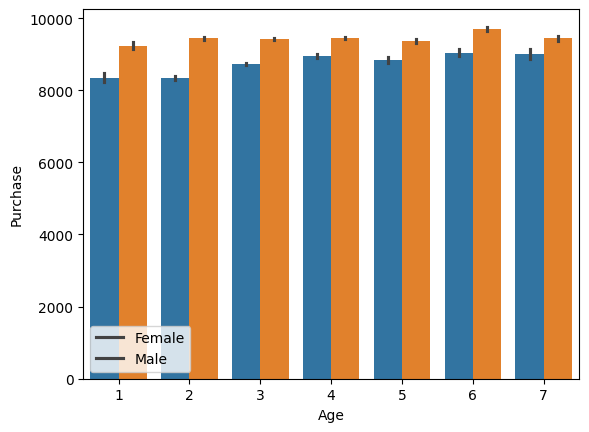

In [60]:
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)
plt.legend(labels=['Female', 'Male'])
plt.show()

<Axes: xlabel='Occupation', ylabel='Purchase'>

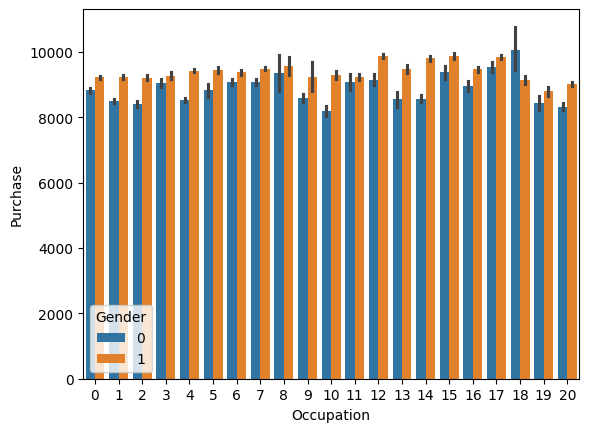

In [61]:
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

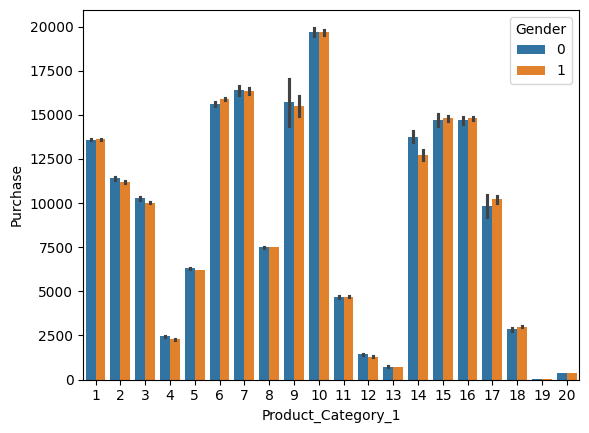

In [62]:
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

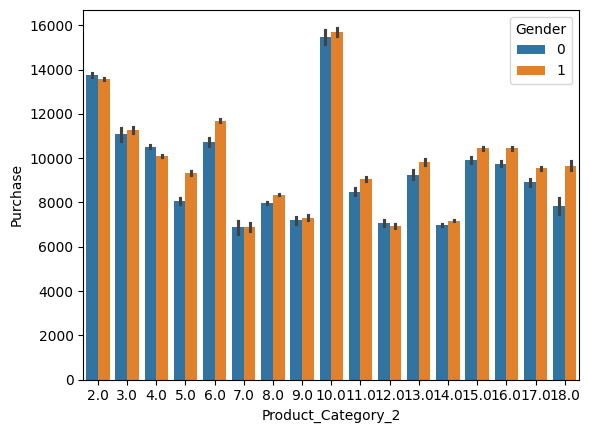

In [63]:
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

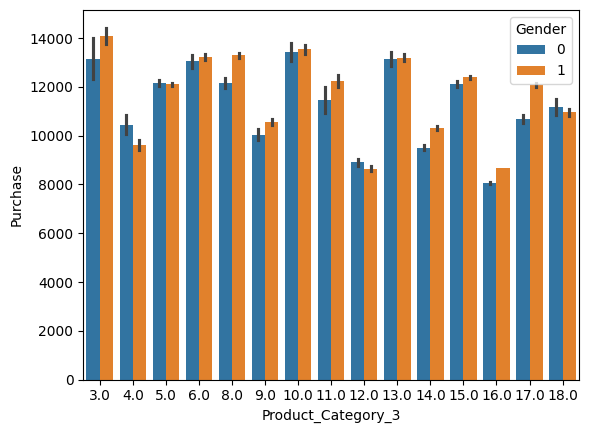

In [64]:
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender', data=df)

In [65]:
df_train=df[df['Purchase'].isnull()==False]
df_test=df[df['Purchase'].isnull()==True]

In [66]:
X=df_train.drop('Purchase',axis=1)

In [67]:
X.shape

(550068, 10)

In [68]:
y=df_train['Purchase']

In [69]:
y.shape

(550068,)